In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_total_all = pd.read_csv('Universitas Internasional Semen Indonesia.csv')
print(df_total_all)

                       nama  \
0     Firdaus Agil Prasetyo   
1                 Miftah NG   
2               MiawLegenD_   
3          Hafiz Nafi'uddin   
4           Chandra Bintang   
..                      ...   
317    Stefanus Eko Wiratno   
318  Achmad Arief al Hinani   
319     putri dwi oktaviana   
320   Titah Hayubunga Dwita   
321          Muhammad Akbar   

                                                review  bintang  
0    Dari luar tampak seperti rumah hantu. Tapi lih...        5  
1    Unik. Kampus "heritage" pertama yang pernah sa...        5  
2    Kekurangan yang ada :1. ParkiranGa ada parkira...        5  
3    Universitasnya sangat bagus, tapi lebih diperh...        5  
4    Hati-hati dengan dosen gadungan yang bernama "...        1  
..                                                 ...      ...  
317                                   With good people        5  
318                                              Bagus        5  
319                              

In [2]:
df_total_all_new = df_total_all.dropna(ignore_index=True)
print(df_total_all_new)

                       nama  \
0     Firdaus Agil Prasetyo   
1                 Miftah NG   
2               MiawLegenD_   
3          Hafiz Nafi'uddin   
4           Chandra Bintang   
..                      ...   
154    Stefanus Eko Wiratno   
155  Achmad Arief al Hinani   
156     putri dwi oktaviana   
157   Titah Hayubunga Dwita   
158          Muhammad Akbar   

                                                review  bintang  
0    Dari luar tampak seperti rumah hantu. Tapi lih...        5  
1    Unik. Kampus "heritage" pertama yang pernah sa...        5  
2    Kekurangan yang ada :1. ParkiranGa ada parkira...        5  
3    Universitasnya sangat bagus, tapi lebih diperh...        5  
4    Hati-hati dengan dosen gadungan yang bernama "...        1  
..                                                 ...      ...  
154                                   With good people        5  
155                                              Bagus        5  
156                              

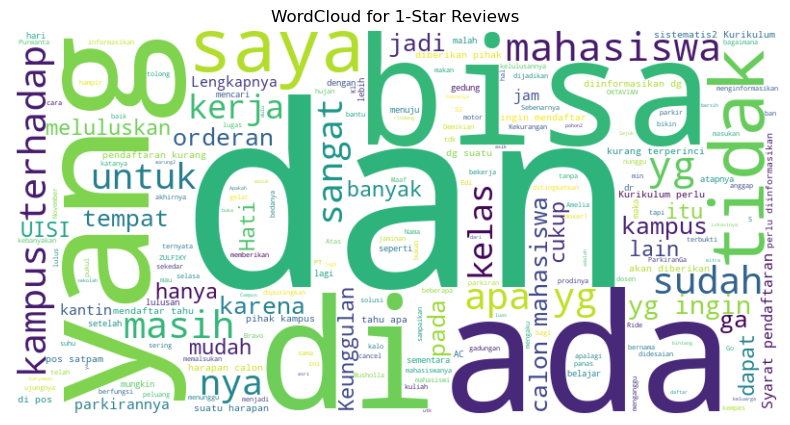

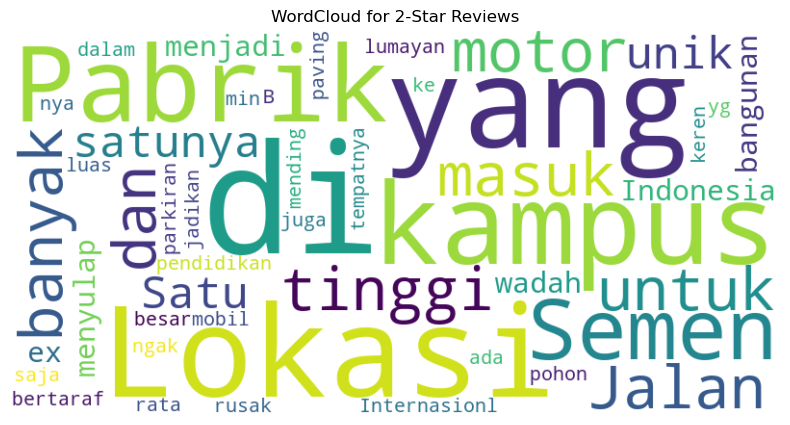

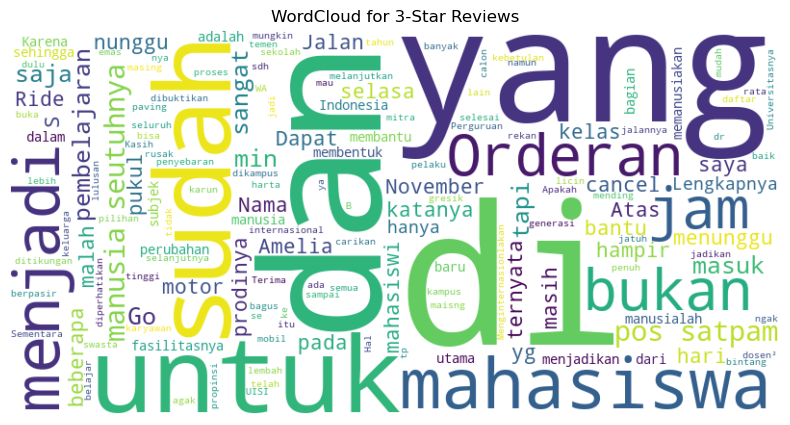

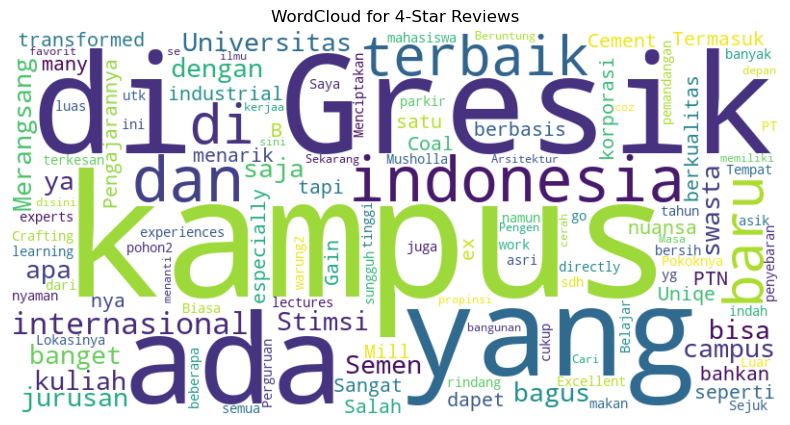

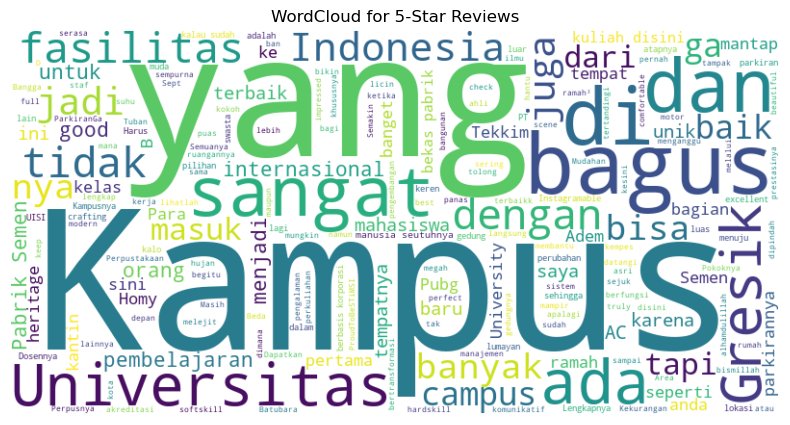

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for bintang in range(1, 6):
    # Filter DataFrame untuk review dengan bintang tertentu
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Gabungkan semua teks dalam satu string
    text = " ".join(review for review in filtered_df.review)
    
    if text:  # Check if there are any reviews for the current star rating
        # Buat wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Tampilkan wordcloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")

In [4]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

translator = GoogleTranslator(source='en', target='id')

def terjemahkan(teks):
    try:
        return translator.translate(teks)
    except Exception as e:
        return str(e)

tqdm.pandas()
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)

df = df_total_all_new[~df_total_all_new['review'].str.contains("exception", case=False, na=False)]
df = df_total_all_new[~df_total_all_new['review'].str.contains("attribute", case=False, na=False)]

# Tampilkan DataFrame setelah terjemahan
print(df_total_all_new)


100%|██████████| 159/159 [01:08<00:00,  2.32it/s]

                       nama  \
0     Firdaus Agil Prasetyo   
1                 Miftah NG   
2               MiawLegenD_   
3          Hafiz Nafi'uddin   
4           Chandra Bintang   
..                      ...   
154    Stefanus Eko Wiratno   
155  Achmad Arief al Hinani   
156     putri dwi oktaviana   
157   Titah Hayubunga Dwita   
158          Muhammad Akbar   

                                                review  bintang  
0    Dari luar tampak seperti rumah hantu. Tapi lih...        5  
1    Unik. Kampus "heritage" pertama yang pernah sa...        5  
2    Kekurangan yang ada :1. ParkirGa ada parkirann...        5  
3    Universitasnya bagus sangat, tapi lebih diperh...        5  
4    Hati-hati dengan dosen gadungan yang bernama "...        1  
..                                                 ...      ...  
154                                  Dengan orang baik        5  
155                                              Bagus        5  
156                              


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_42096\1466462576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)


In [5]:
# Langkah 1: Bersihkan semua string dan ubah ke huruf kecil
df_total_all_new = df_total_all_new.progress_applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Langkah 2: Buat fungsi untuk menghapus tanda baca
def hapus_tanda_baca(teks):
    if not isinstance(teks, str):
        # Return teks as-is if it's not a string
        return teks
    tanda_baca = ".,!?():"
    for char in tanda_baca:
        teks = teks.replace(char, "")
    return teks

# Langkah 3: Aplikasikan fungsi pada kolom yang diinginkan
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(hapus_tanda_baca)

# Langkah 4: Buat fungsi untuk menghitung jumlah kata
def hitung_jumlah_kata(teks):
    if isinstance(teks, str):
        return len(teks.split())
    return 0  # Return 0 for non-string values

# Terapkan jika diperlukan
df_total_all_new['word_count'] = df_total_all_new['review'].progress_apply(hitung_jumlah_kata)

# Tampilkan DataFrame setelah penghapusan tanda baca dan hitung jumlah kata
print(df_total_all_new.head())


  0%|          | 0/477 [00:00<?, ?it/s]C:\Users\HAFIZ\anaconda3\Lib\site-packages\tqdm\std.py:805: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return getattr(df, df_function)(wrapper, **kwargs)
100%|██████████| 159/159 [00:00<?, ?it/s]

                    nama                                             review  \
0  firdaus agil prasetyo  dari luar tampak seperti rumah hantu tapi liha...   
1              miftah ng  unik kampus "heritage" pertama yang pernah say...   
2            miawlegend_  kekurangan yang ada 1 parkirga ada parkirannya...   
3       hafiz nafi'uddin  universitasnya bagus sangat tapi lebih diperha...   
4        chandra bintang  hati-hati dengan dosen gadungan yang bernama "...   

   bintang  word_count  
0        5          85  
1        5          38  
2        5         247  
3        5          40  
4        1          20  


In [6]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Unduh data tokenizer jika belum ada
nltk.download('punkt')


# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi pada kolom 'text'
df_total_all_new['tokens'] = df_total_all_new['review'].astype(str).apply(tokenize_text)

print(df_total_all_new)

                       nama  \
0     firdaus agil prasetyo   
1                 miftah ng   
2               miawlegend_   
3          hafiz nafi'uddin   
4           chandra bintang   
..                      ...   
154    stefanus eko wiratno   
155  achmad arief al hinani   
156     putri dwi oktaviana   
157   titah hayubunga dwita   
158          muhammad akbar   

                                                review  bintang  word_count  \
0    dari luar tampak seperti rumah hantu tapi liha...        5          85   
1    unik kampus "heritage" pertama yang pernah say...        5          38   
2    kekurangan yang ada 1 parkirga ada parkirannya...        5         247   
3    universitasnya bagus sangat tapi lebih diperha...        5          40   
4    hati-hati dengan dosen gadungan yang bernama "...        1          20   
..                                                 ...      ...         ...   
154                                  dengan orang baik        5           

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAFIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['tokens'] = df_total_all_new['tokens'].progress_apply(remove_stopwords)

# Tampilkan DataFrame setelah penghapusan stopwords
print(df_total_all_new)

100%|██████████| 159/159 [00:00<00:00, 79524.72it/s]

                       nama  \
0     firdaus agil prasetyo   
1                 miftah ng   
2               miawlegend_   
3          hafiz nafi'uddin   
4           chandra bintang   
..                      ...   
154    stefanus eko wiratno   
155  achmad arief al hinani   
156     putri dwi oktaviana   
157   titah hayubunga dwita   
158          muhammad akbar   

                                                review  bintang  word_count  \
0    dari luar tampak seperti rumah hantu tapi liha...        5          85   
1    unik kampus "heritage" pertama yang pernah say...        5          38   
2    kekurangan yang ada 1 parkirga ada parkirannya...        5         247   
3    universitasnya bagus sangat tapi lebih diperha...        5          40   
4    hati-hati dengan dosen gadungan yang bernama "...        1          20   
..                                                 ...      ...         ...   
154                                  dengan orang baik        5           

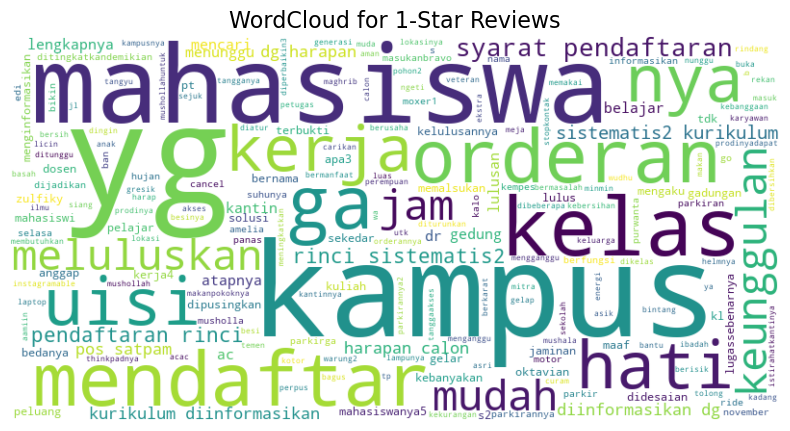

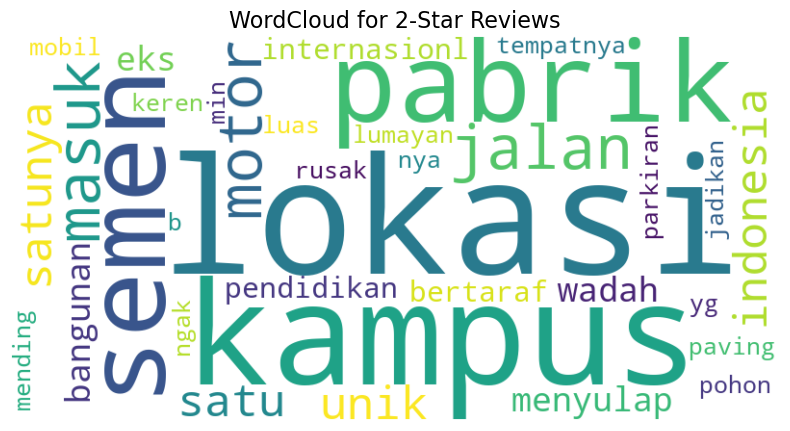

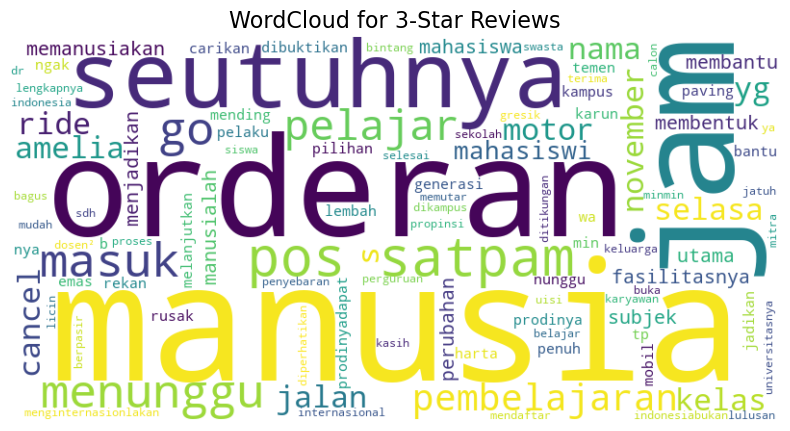

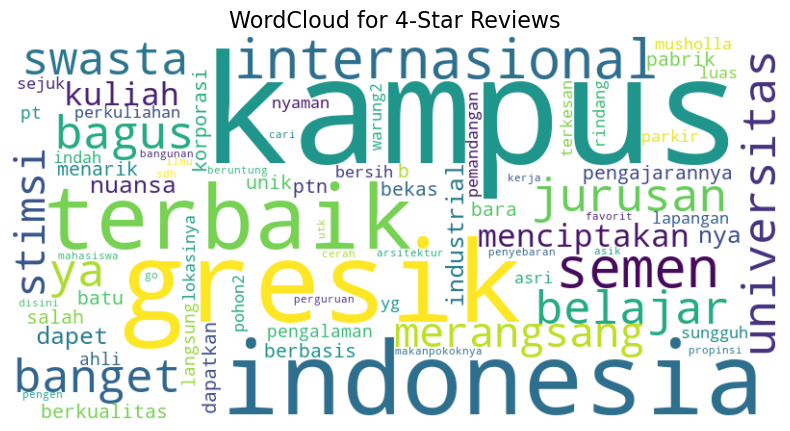

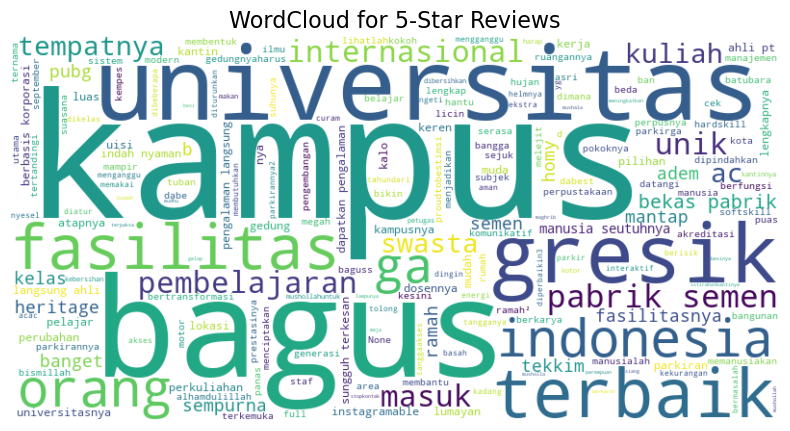

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all tokenized words into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['tokens'].progress_apply(apply_stemming)

print(df_total_all_new)

100%|██████████| 159/159 [00:17<00:00,  9.32it/s]

                       nama  \
0     firdaus agil prasetyo   
1                 miftah ng   
2               miawlegend_   
3          hafiz nafi'uddin   
4           chandra bintang   
..                      ...   
154    stefanus eko wiratno   
155  achmad arief al hinani   
156     putri dwi oktaviana   
157   titah hayubunga dwita   
158          muhammad akbar   

                                                review  bintang  word_count  \
0    dari luar tampak seperti rumah hantu tapi liha...        5          85   
1    unik kampus "heritage" pertama yang pernah say...        5          38   
2    kekurangan yang ada 1 parkirga ada parkirannya...        5         247   
3    universitasnya bagus sangat tapi lebih diperha...        5          40   
4    hati-hati dengan dosen gadungan yang bernama "...        1          20   
..                                                 ...      ...         ...   
154                                  dengan orang baik        5           

In [10]:
import pandas as pd
import re


# Fungsi untuk menghapus angka
def remove_numbers(token_list):
    return [token for token in token_list if not re.search(r'\d', token)]  # Hapus token yang mengandung angka

# Terapkan fungsi ke setiap baris
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens'].apply(remove_numbers)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens2']:
    print(','.join(tokens))


rumah,hantu,lihat,masuk,sempurna,tempat,bagus,ruang,bagus,full,ac,mana,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,ga,nyesel,kalo,kuliah,ajar,interaktif,dosen,muda,muda,tahundari,rumah,hantu,lihat,masuk,sempurna,tempat,bagus,ruang,bagus,full,ac,mana,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,ga lengkap
unik,kampus,,heritage,,datang,area,bekas,pabrik,semen,gresik,pindah,tuban,ajar,,staf,ramah,pustaka,,fasilitas,mantap,adem,masuk,gedungnyaharus,mampir,kesini,instagramable,september
kurang,parkirga,parkir,ga,atap,bikin,ban,motor,kempes,kalo,hujan,helm,basah,ga,ngeti,tanggaakses,gedung,tangga,curam,aman,hujan,licin,tolong,acac,beberapa,kelas,gedung,yg,fungsi,ac,nya,berisik,ganggu,kelas,atur,suhu,kadang,dingin,turun,suhu,menganggu,kelas,pakai,ac,panas,gresik,akses,gedung,kampus,a,parkir,parkir,kantin,butuh,energi,ekstra,kelas,kelas,ac,nya,kantin,mushollahuntuk,kampus,a,kantin,tugas,bersih,kampus,harap,bersih,kotor,makan,istirahatkantinya,siang,panas,atap,besi,musholla,tingkat,mushollah

In [11]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


Total Token Kosong: 34


34

In [12]:
# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 0


0

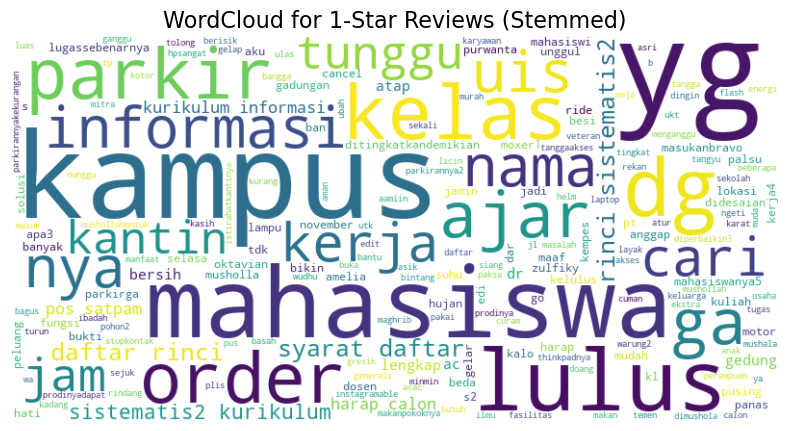

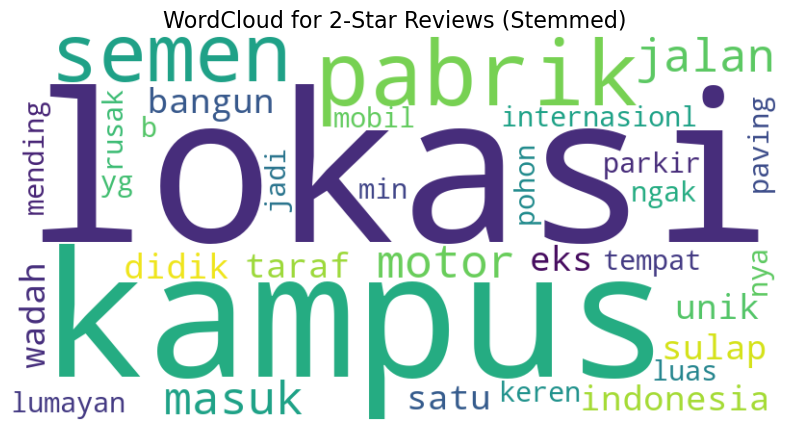

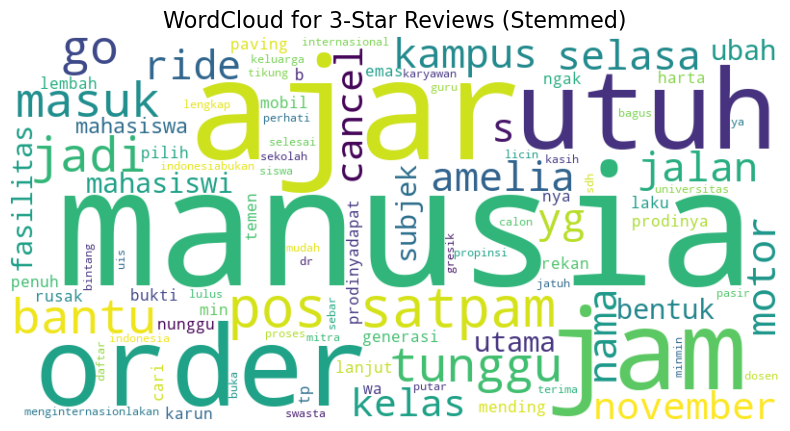

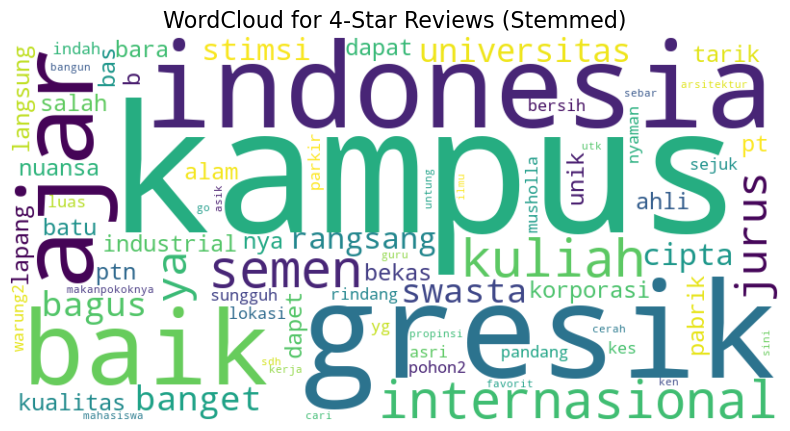

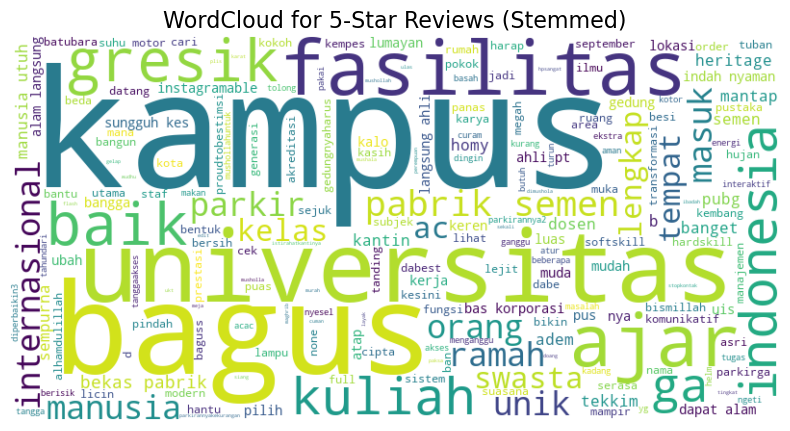

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all stemmed tokens into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['stemmed_tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews (Stemmed)', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [95]:
import pandas as pd
import ast  # Untuk mengubah string menjadi list

# Membaca kembali file Excel
df_total_all_new = pd.read_excel("UISI_Cleaned.xlsx")

# Konversi kembali kolom 'stemmed_tokens2' dari string ke list tokenized
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens2'].apply(ast.literal_eval)

# Cek apakah sudah berbentuk list
print(type(df_total_all_new['stemmed_tokens2'][0]))  # Harusnya <class 'list'>



<class 'list'>


In [96]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/refs/heads/main/Kamus%20Alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['Alay'], kamus_alay['Baik']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens2'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))



100%|██████████| 159/159 [00:00<00:00, 18792.64it/s]

rumah,hantu,lihat,masuk,sempurna,tempat,bagus,ruang,bagus,full,ac,mana,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,ga,nyesel,kalo,kuliah,ajar,interaktif,dosen,muda,muda,tahun,dari,rumah,hantu,lihat,masuk,sempurna,tempat,bagus,ruang,bagus,full,ac,mana,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,ga lengkap
unik,kampus,,heritage,datang,area,bekas,pabrik,semen,gresik,pindah,tuban,ajar,staf,ramah,pustaka,fasilitas,mantap,adem,masuk,gedung,harus,mampir,kesini,instagramable,september
kurang,parkiran,parkir,ga,atap,bikin,ban,motor,kempes,kalo,hujan,helm,basah,ga,ngeti,tangga,akses,gedung,tangga,curam,aman,hujan,licin,tolong,acac,beberapa,kelas,gedung,yg,fungsi,ac,nya,berisik,ganggu,kelas,atur,suhu,kadang,dingin,turun,suhu,menganggu,kelas,pakai,ac,panas,gresik,akses,gedung,kampus,a,parkir,parkir,kantin,butuh,energi,ekstra,kelas,kelas,ac,nya,kantin,mushollah,untuk,kampus,kantin,tugas,bersih,kampus,harap,bersih,kotor,makan,istirahat,kantin,siang,panas,atap,besi,musholla,tingkat,mushollah,ibad

In [97]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/Aiji3107/kamus_alay/refs/heads/main/kamus_alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 159/159 [00:00<00:00, 86006.49it/s]

rumah,hantu,lihat,masuk,sempurna,tempat,bagus,ruang,bagus,full,ac,mana,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,enggak,menyesal,kalo,kuliah,ajar,interaktif,dosen,muda,muda,tahun,dari,rumah,hantu,lihat,masuk,sempurna,tempat,bagus,ruang,bagus,full,ac,mana,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,ga lengkap
unik,kampus,,heritage,datang,area,bekas,pabrik,semen,gresik,pindah,tuban,ajar,staf,ramah,pustaka,fasilitas,mantap,adem,masuk,gedung,harus,mampir,kesini,instagramable,september
kurang,parkiran,parkir,enggak,atap,bikin,ban,motor,kempes,kalo,hujan,helm,basah,enggak,ngeti,tangga,akses,gedung,tangga,curam,aman,hujan,licin,tolong,acac,beberapa,kelas,gedung,yang,fungsi,ac,nya,berisik,ganggu,kelas,atur,suhu,kadang,dingin,turun,suhu,menganggu,kelas,pakai,ac,panas,gresik,akses,gedung,kampus,a,parkir,parkir,kantin,butuh,energi,ekstra,kelas,kelas,ac,nya,kantin,mushollah,untuk,kampus,kantin,tugas,bersih,kampus,harap,bersih,kotor,makan,istirahat,kantin,siang,panas,atap,besi,musholla,tingka

In [98]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(remove_stopwords)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(apply_stemming)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 159/159 [00:00<00:00, 79619.67it/s]


rumah,hantu,lihat,masuk,sempurna,bagus,ruang,bagus,full,ac,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,menyesal,kalo,kuliah,ajar,interaktif,dosen,muda,muda,rumah,hantu,lihat,masuk,sempurna,bagus,ruang,bagus,full,ac,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,ga lengkap
unik,kampus,,heritage,area,bekas,pabrik,semen,gresik,pindah,tuban,ajar,staf,ramah,pustaka,fasilitas,mantap,adem,masuk,gedung,mampir,kesini,instagramable,september
parkiran,parkir,atap,bikin,ban,motor,kempes,kalo,hujan,helm,basah,ngeti,tangga,akses,gedung,tangga,curam,aman,hujan,licin,tolong,acac,kelas,gedung,fungsi,ac,nya,berisik,ganggu,kelas,atur,suhu,kadang,dingin,turun,suhu,menganggu,kelas,pakai,ac,panas,gresik,akses,gedung,kampus,a,parkir,parkir,kantin,butuh,energi,ekstra,kelas,kelas,ac,nya,kantin,mushollah,kampus,kantin,tugas,bersih,kampus,harap,bersih,kotor,makan,istirahat,kantin,siang,panas,atap,besi,musholla,tingkat,mushollah,ibadah,meja,kantin,stop,kontak,fungsi,besi,karat,mushala,wudhu,perempuan,maghrib,lam

100%|██████████| 159/159 [00:12<00:00, 12.62it/s]

rumah,hantu,lihat,masuk,sempurna,bagus,ruang,bagus,full,ac,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,sesal,kalo,kuliah,ajar,interaktif,dosen,muda,muda,rumah,hantu,lihat,masuk,sempurna,bagus,ruang,bagus,full,ac,pus,bagus,dosen,ramah,ramah,komunikatif,pokok,ga lengkap
unik,kampus,,heritage,area,bekas,pabrik,semen,gresik,pindah,tuban,ajar,staf,ramah,pustaka,fasilitas,mantap,adem,masuk,gedung,mampir,kesini,instagramable,september
parkir,parkir,atap,bikin,ban,motor,kempes,kalo,hujan,helm,basah,ngeti,tangga,akses,gedung,tangga,curam,aman,hujan,licin,tolong,acac,kelas,gedung,fungsi,ac,nya,berisik,ganggu,kelas,atur,suhu,kadang,dingin,turun,suhu,menganggu,kelas,pakai,ac,panas,gresik,akses,gedung,kampus,a,parkir,parkir,kantin,butuh,energi,ekstra,kelas,kelas,ac,nya,kantin,mushollah,kampus,kantin,tugas,bersih,kampus,harap,bersih,kotor,makan,istirahat,kantin,siang,panas,atap,besi,musholla,tingkat,mushollah,ibadah,meja,kantin,stop,kontak,fungsi,besi,karat,mushala,wudhu,perempuan,maghrib,lampu,ge

In [99]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 7
Total Token Kosong: 0


0

In [100]:
import ast
import pandas as pd

# Kata-kata yang ingin dihapus
stopwords = {'none','oktavian','instagramable', 'nya', 'moga','ken','pus','imsi', 'oke', 'ya', 'isi', 'ok', 'jos', 'gaes', 'via','nih','pubg','a','b','uis','kes','eks','amelia'}

# Fungsi untuk menghitung jumlah token kosong atau yang termasuk stopwords
def count_empty_tokens(df):
    empty_tokens = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip() or token.lower() in stopwords))
    total_empty_tokens = empty_tokens.sum()
    print(f"Total empty or stopword tokens: {total_empty_tokens}")

# Pastikan kolom 'stemmed_tokens4' berisi list, bukan string yang terlihat seperti list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Bersihkan token kosong dan kata-kata yang ada dalam stopwords
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip() and token.lower() not in stopwords]
)

# Konfirmasi bahwa token yang tidak diinginkan sudah dihapus
count_empty_tokens(df_total_all_new)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


Total empty or stopword tokens: 0
rumah,hantu,lihat,masuk,sempurna,bagus,ruang,bagus,full,ac,bagus,dosen,ramah,ramah,komunikatif,pokok,sesal,kalo,kuliah,ajar,interaktif,dosen,muda,muda,rumah,hantu,lihat,masuk,sempurna,bagus,ruang,bagus,full,ac,bagus,dosen,ramah,ramah,komunikatif,pokok,ga lengkap
unik,kampus,heritage,area,bekas,pabrik,semen,gresik,pindah,tuban,ajar,staf,ramah,pustaka,fasilitas,mantap,adem,masuk,gedung,mampir,kesini,september
parkir,parkir,atap,bikin,ban,motor,kempes,kalo,hujan,helm,basah,ngeti,tangga,akses,gedung,tangga,curam,aman,hujan,licin,tolong,acac,kelas,gedung,fungsi,ac,berisik,ganggu,kelas,atur,suhu,kadang,dingin,turun,suhu,menganggu,kelas,pakai,ac,panas,gresik,akses,gedung,kampus,parkir,parkir,kantin,butuh,energi,ekstra,kelas,kelas,ac,kantin,mushollah,kampus,kantin,tugas,bersih,kampus,harap,bersih,kotor,makan,istirahat,kantin,siang,panas,atap,besi,musholla,tingkat,mushollah,ibadah,meja,kantin,stop,kontak,fungsi,besi,karat,mushala,wudhu,perempuan,maghrib,lampu,g

In [101]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

# Inisialisasi translator
translator = GoogleTranslator(source='en', target='id')

# Fungsi untuk menerjemahkan daftar token
def terjemahkan_daftar(token_list):
    if not isinstance(token_list, list):  # Pastikan input adalah list
        return token_list
    try:
        teks = " ".join(token_list)  # Gabungkan token menjadi satu kalimat
        hasil_terjemahan = translator.translate(teks)  # Terjemahkan teks
        return hasil_terjemahan.split()  # Ubah kembali ke dalam daftar token
    except Exception as e:
        return [str(e)]

# Aktifkan tqdm untuk progress bar
tqdm.pandas()

# Terapkan terjemahan pada kolom 'stemmed_tokens4'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(terjemahkan_daftar)

# Filter error jika ada
df_total_all_new = df_total_all_new[~df_total_all_new['stemmed_tokens4'].astype(str).str.contains("exception", case=False, na=False)]
df_total_all_new = df_total_all_new[~df_total_all_new['stemmed_tokens4'].astype(str).str.contains("attribute", case=False, na=False)]

# Tampilkan DataFrame setelah terjemahan
print(df_total_all_new)


100%|██████████| 159/159 [00:56<00:00,  2.83it/s]

                       nama  bintang  word_count  \
0     firdaus agil prasetyo        5          85   
1                 miftah ng        5          38   
2               miawlegend_        5         247   
3          hafiz nafi'uddin        5          40   
4           chandra bintang        1          20   
..                      ...      ...         ...   
154    stefanus eko wiratno        5           3   
155  achmad arief al hinani        5           1   
156     putri dwi oktaviana        5           1   
157   titah hayubunga dwita        5           4   
158          muhammad akbar        5           4   

                                       stemmed_tokens2  \
0    [rumah, hantu, lihat, masuk, sempurna, tempat,...   
1    [unik, kampus, , heritage, datang, area, bekas...   
2    [kurang, parkiran, parkir, ga, atap, bikin, ba...   
3    [universitas, bagus, perhati, kampus, putar, l...   
4    [hati, dosen, gadungan, nama, , oktavian, zulf...   
..                         

In [102]:
import gensim
from gensim import corpora

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 159/159 [00:00<?, ?it/s]


Topic: 0 
Words: 0.050*"kampus" + 0.038*"banget" + 0.026*"bagus" + 0.026*"terbuka" + 0.026*"asri" + 0.026*"cipta" + 0.026*"bantu" + 0.014*"universitas" + 0.014*"lokasi" + 0.014*"mudah"
Topic: 1 
Words: 0.082*"kampus" + 0.072*"bagus" + 0.048*"manusia" + 0.032*"ajar" + 0.029*"mahasiswa" + 0.020*"lulus" + 0.020*"daftar" + 0.020*"utuh" + 0.015*"informasi" + 0.015*"kerja"
Topic: 2 
Words: 0.095*"kampus" + 0.039*"gresik" + 0.039*"masuk" + 0.029*"fasilitas" + 0.029*"orang" + 0.020*"motor" + 0.020*"jalan" + 0.020*"mantap" + 0.020*"korporasi" + 0.020*"bas"
Topic: 3 
Words: 0.047*"parkir" + 0.030*"kelas" + 0.030*"kantin" + 0.024*"kampus" + 0.021*"ac" + 0.018*"atap" + 0.012*"harap" + 0.012*"motor" + 0.012*"bersih" + 0.012*"kalo"
Topic: 4 
Words: 0.045*"universitas" + 0.045*"kampus" + 0.039*"indonesia" + 0.034*"semen" + 0.034*"order" + 0.028*"tunggu" + 0.028*"kuliah" + 0.025*"internasional" + 0.023*"pos" + 0.023*"jam"


In [103]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import pandas as pd

def compute_coherence_values(dictionary, corpus, texts, topic_range, passes_range):
    results = []
    best_coherence = 0
    best_model = None
    best_params = {}
    
    for num_topics in tqdm(topic_range, desc="Computing coherence for topics"):
        for passes in tqdm(passes_range, desc=f"Testing {num_topics} topics", leave=False):
            # Membuat model LDA dengan jumlah topik dan passes yang berbeda
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=100)
            
            # Menghitung nilai koherensi
            coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            
            # Simpan hasil
            results.append({'num_topics': num_topics, 'passes': passes, 'coherence': coherence_score})
            
            # Cek apakah nilai koherensi saat ini adalah yang terbaik
            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_model = lda_model
                best_params = {'num_topics': num_topics, 'passes': passes}
    
    # Konversi hasil ke DataFrame untuk analisis lebih lanjut
    results_df = pd.DataFrame(results)
    
    print(f"\n✅ Nilai koherensi optimal: {best_coherence:.4f}")
    print(f"📊 Parameter terbaik: {best_params}")

    return results_df, best_model, best_params

# 🔥 Jalankan fungsi dengan rentang topik dan passes yang diinginkan
topic_range = range(1, 11)  # Dari 1 hingga 10 topik
passes_range = range(15, 91, 15)  # Dari 15 hingga 90 dengan kelipatan 15

results_df, best_lda_model, best_params = compute_coherence_values(dictionary=dictionary, 
                                                                   corpus=corpus, 
                                                                   texts=df_total_all_new['stemmed_tokens4'], 
                                                                   topic_range=topic_range, 
                                                                   passes_range=passes_range)


Computing coherence for topics: 100%|██████████| 10/10 [09:59<00:00, 59.96s/it]


✅ Nilai koherensi optimal: 0.6174
📊 Parameter terbaik: {'num_topics': 7, 'passes': 60}


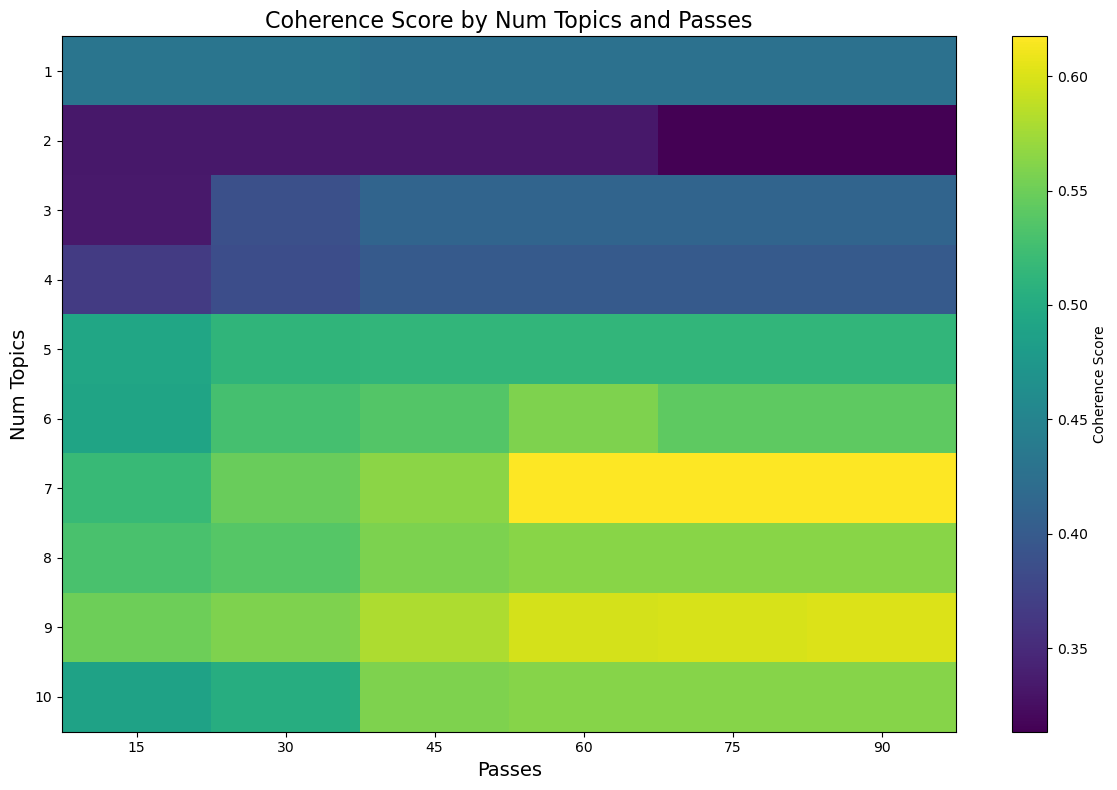

In [104]:
import matplotlib.pyplot as plt

# Visualisasi nilai koherensi dengan sumbu x dan y yang sesuai
pivot_table = results_df.pivot(index='num_topics', columns='passes', values='coherence')

# Membuat heatmap dengan label yang sesuai
plt.figure(figsize=(12, 8))
plt.title("Coherence Score by Num Topics and Passes", fontsize=16)
plt.xlabel("Passes", fontsize=14)
plt.ylabel("Num Topics", fontsize=14)

# Menentukan label sumbu x dan y dengan nilai yang sesuai
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)

# Menampilkan heatmap
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Coherence Score')
plt.tight_layout()
plt.show()


In [107]:
# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=7, id2word=dictionary, passes=60)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 159/159 [00:00<00:00, 39752.88it/s]


Topic: 0 
Words: 0.097*"kampus" + 0.018*"adem" + 0.018*"warisan" + 0.018*"ilmu" + 0.018*"mantap" + 0.018*"cipta" + 0.018*"ajar" + 0.018*"masuk" + 0.018*"bangga" + 0.018*"cari"
Topic: 1 
Words: 0.045*"kampus" + 0.035*"parkir" + 0.030*"mahasiswa" + 0.025*"kelas" + 0.025*"kantin" + 0.020*"lulus" + 0.020*"daftar" + 0.020*"harap" + 0.018*"ac" + 0.015*"atap"
Topic: 2 
Words: 0.124*"kampus" + 0.065*"semen" + 0.053*"indonesia" + 0.049*"kuliah" + 0.043*"internasional" + 0.027*"pabrik" + 0.027*"unik" + 0.025*"universitas" + 0.025*"bekas" + 0.025*"pt"
Topic: 3 
Words: 0.084*"manusia" + 0.050*"fasilitas" + 0.042*"ajar" + 0.034*"tunggu" + 0.034*"order" + 0.034*"utuh" + 0.034*"jam" + 0.034*"pos" + 0.034*"satpam" + 0.017*"nama"
Topic: 4 
Words: 0.053*"masuk" + 0.036*"lokasi" + 0.036*"luas" + 0.036*"motor" + 0.036*"jalan" + 0.036*"parkir" + 0.018*"tekkim" + 0.018*"asri" + 0.018*"lumayan" + 0.018*"keren"
Topic: 5 
Words: 0.092*"universitas" + 0.062*"bagus" + 0.031*"bantu" + 0.031*"kampus" + 0.016*"muda

In [109]:
import os
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

# Pastikan semua elemen dalam kolom 'stemmed_tokens4' adalah list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(lambda x: x if isinstance(x, list) else [])

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = LdaModel(corpus, num_topics=7, id2word=dictionary, passes=60)

# Mengambil topik-topik dan menyimpannya dalam format yang dapat diekspor
topics = []
for idx, topic in lda_model.print_topics(-1):
    words = topic.split(' + ')
    topic_dict = {'Topic': idx}
    for i, word in enumerate(words):
        weight, term = word.split('*"')
        term = term.replace('"', '')
        topic_dict[f'Word_{i+1}'] = f'{term} ({weight})'
    topics.append(topic_dict)

# Konversi ke DataFrame
df_topics = pd.DataFrame(topics)

# Simpan ke file Excel dengan sheet baru
file_path = 'Seluruh_Univ_lda_topics2.xlsx'
sheet_name = 'UISI_Univ_lda_topics'  # Nama sheet baru yang diinginkan

# Cek apakah file sudah ada
file_exists = os.path.exists(file_path)

if file_exists:
    # Jika file sudah ada, gunakan mode append dengan if_sheet_exists="replace"
    with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)
else:
    # Jika file belum ada, buat file baru tanpa if_sheet_exists
    with pd.ExcelWriter(file_path, mode="w", engine="openpyxl") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Topik telah disimpan dalam sheet '{sheet_name}' pada file '{file_path}'")


Topik telah disimpan dalam sheet 'UISI_Univ_lda_topics' pada file 'Seluruh_Univ_lda_topics2.xlsx'
